## WeatherPy_Brucato

Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Analysis presented at the end of notebook.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

city_counter = 1
set_counter = 1
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")
print("-----------")

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        city_counter = 1
    query_url = url +"&q=" + city
    response = requests.get(query_url).json()
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    city_counter += 1
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found.")
        pass

print("-----------")
print("Completed")

Started
-----------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | beipiao
Processing Record 5 of Set 1 | mahajanga
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | saint-augustin
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | adrar
Processing Record 18 of Set 1 | kautokeino
Processing Record 19 of Set 1 | terrace
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | dicabisagan
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | acari
Processing Record 24 of Set 1 | montepu

Processing Record 42 of Set 1 | batsfjord
Processing Record 43 of Set 1 | rio gallegos
Processing Record 44 of Set 1 | ukiah
Processing Record 45 of Set 1 | westport
Processing Record 46 of Set 1 | verkhnyaya inta
Processing Record 47 of Set 1 | sept-iles
Processing Record 48 of Set 1 | leningradskiy
Processing Record 49 of Set 1 | uruzgan
Processing Record 50 of Set 1 | dinguiraye
Processing Record 1 of Set 1 | luis correia
Processing Record 2 of Set 1 | meyungs
City not found.
Processing Record 3 of Set 1 | nizhneyansk
City not found.
Processing Record 4 of Set 1 | bay village
Processing Record 5 of Set 1 | kedrovyy
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | skelleftea
Processing Record 8 of Set 1 | oyama
Processing Record 9 of Set 1 | berlevag
Processing Record 10 of Set 1 | rocha
Processing Record 11 of Set 1 | baykit
Processing Record 12 of Set 1 | mahaicony
City not found.
Processing Record 13 of Set 1 | rodrigues alves
Processing Record 14 of Set 1

Processing Record 36 of Set 1 | atikokan
Processing Record 37 of Set 1 | vangaindrano
Processing Record 38 of Set 1 | ruatoria
City not found.
Processing Record 39 of Set 1 | bargal
City not found.
Processing Record 40 of Set 1 | nome
Processing Record 41 of Set 1 | gigmoto
Processing Record 42 of Set 1 | mount gambier
Processing Record 43 of Set 1 | rawson
Processing Record 44 of Set 1 | road town
Processing Record 45 of Set 1 | lasa
Processing Record 46 of Set 1 | puerto escondido
Processing Record 47 of Set 1 | pedreira
Processing Record 48 of Set 1 | torres
Processing Record 49 of Set 1 | conakry
Processing Record 50 of Set 1 | mackenzie
Processing Record 1 of Set 1 | esik
Processing Record 2 of Set 1 | tashla
Processing Record 3 of Set 1 | fort nelson
Processing Record 4 of Set 1 | lahij
Processing Record 5 of Set 1 | pravdinsk
Processing Record 6 of Set 1 | karamken
City not found.
Processing Record 7 of Set 1 | motala
Processing Record 8 of Set 1 | kyaikkami
Processing Record 9 

Processing Record 32 of Set 1 | darhan
Processing Record 33 of Set 1 | dwarka
Processing Record 34 of Set 1 | baculin
Processing Record 35 of Set 1 | mafinga
City not found.
Processing Record 36 of Set 1 | vestmannaeyjar
Processing Record 37 of Set 1 | viedma
Processing Record 38 of Set 1 | fomboni
Processing Record 39 of Set 1 | kuytun
Processing Record 40 of Set 1 | novo horizonte
Processing Record 41 of Set 1 | rondonopolis
Processing Record 42 of Set 1 | grindavik
Processing Record 43 of Set 1 | fortuna foothills
Processing Record 44 of Set 1 | pontian kecil
Processing Record 45 of Set 1 | ryki
Processing Record 46 of Set 1 | bull savanna
Processing Record 47 of Set 1 | mardan
Processing Record 48 of Set 1 | natalio
Processing Record 49 of Set 1 | hingatungan
Processing Record 50 of Set 1 | jackson
Processing Record 1 of Set 1 | sungairaya
Processing Record 2 of Set 1 | rungata
City not found.
Processing Record 3 of Set 1 | luziania
Processing Record 4 of Set 1 | kushima
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [4]:
# create dictionary 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create data frame and count variables for each column
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [5]:
# save output file to CSV
weather_df.to_csv("cities_weather.csv", index=False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,0,PF,1578433587,79,-23.12,-134.97,77.29,18.25
1,Port Macquarie,5,AU,1578433587,73,-31.43,152.91,81.00,5.82
2,Atuona,1,PF,1578433587,74,-9.80,-139.03,81.09,12.12
3,Beipiao,65,CN,1578433587,79,41.80,120.76,10.24,13.49
4,Mahajanga,20,MG,1578433588,94,-15.72,46.32,78.80,1.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

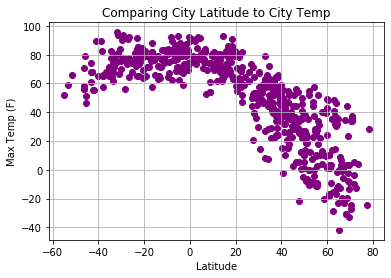

In [6]:
# create scatter plot for lat vs temp 
plt.title("Comparing City Latitude to City Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", color="purple")
plt.grid()
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

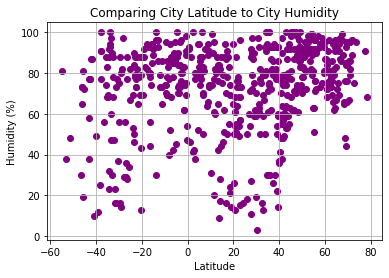

In [7]:
# create scatter plot for lat vs humidity 
plt.title("Comparing City Latitude to City Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", color="purple")
plt.grid()
plt.savefig("lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

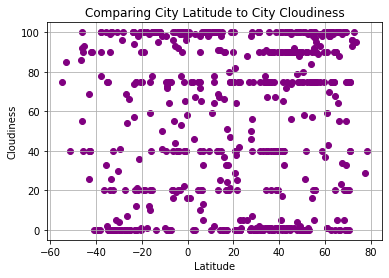

In [8]:
# create scatter plot for lat vs cloudiness 
plt.title("Comparing City Latitude to City Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", color="purple")
plt.grid()
plt.savefig("lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

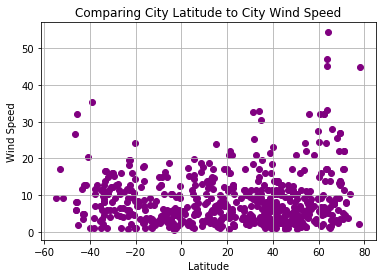

In [9]:
# create scatter plot for lat vs wind speed  
plt.title("Comparing City Latitude to City Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", color="purple")
plt.grid()
plt.savefig("lat_vs_wind.png")
plt.show()

## Analysis
* The first plot, comparing city latitude and city temp, shows that as cities get closer to the equator (latitude=0), the higher the city temp.  Subsequently, cities furthest from the equator showed lower max temps overall. 
* The second plot, comparing city latitude and city humidity, does not show an obvious correlation.  Regardless of city latitude, humidity levels tended to be scattered mostly between 40% - 100%.
* The last plot, comparing city latitude to city wind speed, shows that most wind speeds are 20 and lower, regardless of latitude.  Some of the data points may suggest that cities furthest from the equator have stronger wind speeds (~45) than those closest to the equator. 